In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
plt.rcParams['figure.figsize'] = 15, 4

In [109]:
nu = .3
G = 1
mu = 1
ep = 2/((G+2)**2)
vp = G/(G+2)
sigp = 1-vp

a0 = ep
a1 = (mu*vp - 2*nu*vp + nu - (4*G*a0*mu*nu - 6*G*mu*nu*vp**2 + 8*G*mu*nu*vp - \
          2*G*mu*nu + mu**2*vp**2 - 4*mu*nu*vp**2 + 2*mu*nu*vp + 4*nu**2*vp**2 - 4*nu**2*vp + nu**2)**(1/2))/(2*G*nu)

a2 = (a1*mu - a1*nu - 3*mu*vp/2 + mu)/(3*G*a1*nu - mu*vp + 4*nu*vp - 2*nu)
a3 = (2*G*a2**2*nu + a2*mu - 2*a2*nu - mu/2)/(4*G*a1*nu - mu*vp + 6*nu*vp - 3*nu)

### Possible result

In [90]:
def H(n):
    C1 = 1.7
    C2 = .7
    k = 30
    pt1 = .5*(k**2+k-2)*C2**(k-2)
    pt2 = ((C1*C2)**(k+1))/(C1**k*C2**2*(C1*C2-1)**2)
    pt3 = (C1*C2)**(n-k)*(n*C1*C2-n-1)-k*C1*C2+k+1
    coef = -nu*G/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    whole = (pt1+pt2*pt3)*A[k]*coef
    return whole

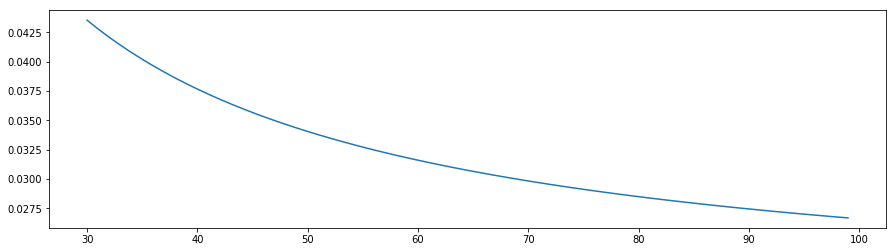

In [93]:
domain = np.arange(30,100)
plt.plot(domain,H(domain))
plt.show()

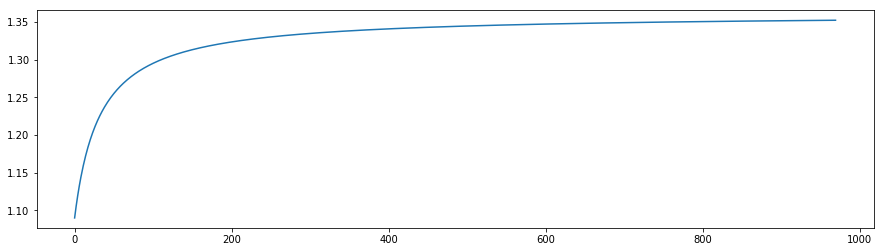

[1.0897866212374832, 1.0979962843117634, 1.1057238583600768, 1.1130105961106527, 1.119893174117125]


In [70]:
C=[]
for n in range(30,1000):
    C.append((mu-(n-1)*nu)/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1))
plt.plot(C)
plt.show()
print(C[:5])

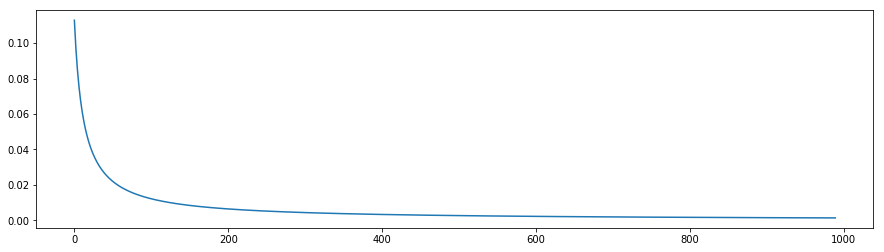

In [68]:
C=[]
for n in range(10,1000):
    C.append((-nu*G)/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1))
    
plt.plot(C)
plt.show()

In [95]:
p = [p1[i]*p2[i] for i in range(len(p1))]

In [96]:
p

[1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 0.9999999999999999,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0]

## Create List of Coefficients

In [97]:
A = [a0,a1,a2,a3]

In [48]:
for n in range(4,100):
    s = 0
    for r in range(2,len(A)):
        s += r*A[r]*A[n-r+1]
    an = ((mu-(n-1)*nu)*A[-1]-nu*G*(s))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    A.append(an)

### Create Lists of Ratios

In [49]:
p1=[]
p2 = []
for i in range(len(A)-1):
    p1.append(abs(A[i+1]/A[i]))
    p2.append(abs(A[i]/A[i+1]))

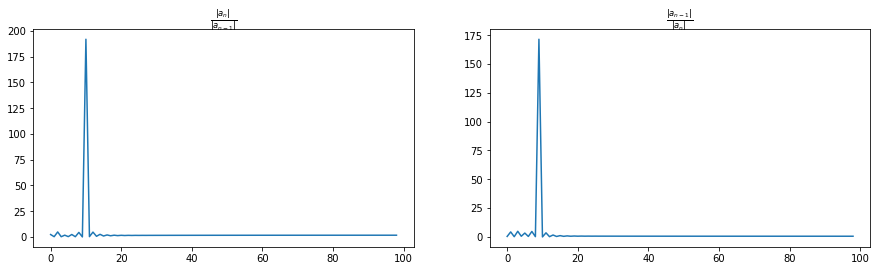

In [50]:
plt.subplot(121)
plt.plot(p1)
plt.title(r'$\frac{|a_n|}{|a_{n-1}|}$')
plt.subplot(122)
plt.plot(p2)
plt.title(r'$\frac{|a_{n-1}|}{|a_{n}|}$')
plt.show()

In [51]:
p2

[0.4285714285714285,
 4.330827067669173,
 0.20696887015405807,
 4.89110889110889,
 0.5877423310263815,
 3.343856039609474,
 0.42508149190230393,
 4.740903751133141,
 0.2279516529207383,
 171.46353826970392,
 0.005209294863300168,
 3.5527825994731823,
 0.21361690334202305,
 1.6672902964839778,
 0.39478768990094987,
 1.1233495322158666,
 0.521227416639834,
 0.8967114239560378,
 0.5969839725218944,
 0.787533346895052,
 0.6364981396577657,
 0.7305434432745301,
 0.6540534794906406,
 0.6988480922511602,
 0.6597297236882128,
 0.6799973237057544,
 0.6595384024368307,
 0.667887289717668,
 0.6567265221554086,
 0.6594401001983949,
 0.6529315645704703,
 0.6530774081790963,
 0.6489302818236079,
 0.6479760152438285,
 0.6450639498988493,
 0.6436957204721231,
 0.6414632070305514,
 0.639991891261917,
 0.638161591101639,
 0.6367210008533329,
 0.6351508528862058,
 0.6337929923568062,
 0.6324069694951526,
 0.6311471403264409,
 0.6299018492845903,
 0.6287396635967303,
 0.6276082435161753,
 0.62653721583227

In [52]:
p1

[2.333333333333334,
 0.2309027777777778,
 4.831644484775156,
 0.20445261437908505,
 1.7014258582560966,
 0.29905593666549984,
 2.35249009672204,
 0.21093024716247114,
 4.386895147225419,
 0.005832143732080508,
 191.96456070188447,
 0.281469516358328,
 4.681277484857532,
 0.599775577239803,
 2.5330070455107014,
 0.8901948781938306,
 1.9185483496755429,
 1.1151859709651988,
 1.6750868465959108,
 1.2697875003549044,
 1.5710965008282398,
 1.3688439875904972,
 1.5289269629431117,
 1.4309261355765543,
 1.515772238378937,
 1.4705940231504733,
 1.5162119389943756,
 1.4972586174273865,
 1.5227038443916516,
 1.516437959564707,
 1.5315540774289997,
 1.531212054614153,
 1.5409975894326038,
 1.5432669982757117,
 1.5502338956576434,
 1.5535290482691777,
 1.558935865751646,
 1.5625197969746611,
 1.5670012328283978,
 1.5705465952274245,
 1.57442912255549,
 1.577802235208417,
 1.5812602457532925,
 1.5844165902150513,
 1.5875489191462893,
 1.5904834033842563,
 1.5933506456153284,
 1.5960743827030728,
 1

In [53]:
A

[0.16326530612244897,
 -0.380952380952381,
 -0.08796296296296298,
 0.4250057648644814,
 -0.0868935397527259,
 0.14784291545069192,
 -0.04421330155946497,
 0.10401135406202647,
 -0.02193914062000654,
 0.09624470952020277,
 -0.0005613129793741598,
 0.10775219950182652,
 0.03032895948032518,
 0.14197827515440264,
 0.08515510193624343,
 0.21569847316568658,
 0.1920136760463236,
 0.3683875212938085,
 0.41082059562549866,
 0.6881601760429704,
 0.8738171897813944,
 1.3728511292291148,
 1.8792190141020984,
 2.87318861993607,
 4.111320688707654,
 6.231825763016033,
 9.164485720406516,
 13.89530266402383,
 20.804861655471402,
 31.679642824822768,
 48.04021292501295,
 73.57618398586092,
 112.66073985165905,
 173.60992853510027,
 267.926473281225,
 415.34870042456697,
 645.2562712704173,
 1005.9131438846271,
 1571.7592013567505,
 2462.948606235406,
 3868.175547743147,
 6090.168233523845,
 9609.081051649218,
 15194.45786519415,
 24074.351120937183,
 38219.21010119208,
 60787.01935640193,
 96855.036

### Compare positive and negative partial sums

In [101]:
sum_pos = []
sum_neg = []

sum_Pos = []
sum_Neg = []
other = []
for n in range(4,100):
    s = 0
    sp = 0
    sn = 0
    for r in range(2,len(A)):
        temp = r*A[r]*A[n-r+1]
        if temp >= 0:
            sp += temp
        else:
            sn += temp
        s += temp
    same = ((mu-(n-1)*nu)*A[-1])/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    Sp = (-nu*G*(sp))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    Sn = (-nu*G*(sn))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    sum_pos.append(sp)
    sum_neg.append(sn)
    sum_Pos.append(Sp)
    sum_Neg.append(Sn)
    other.append(same)

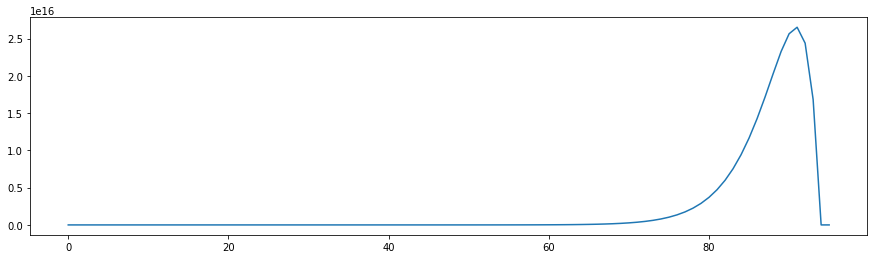

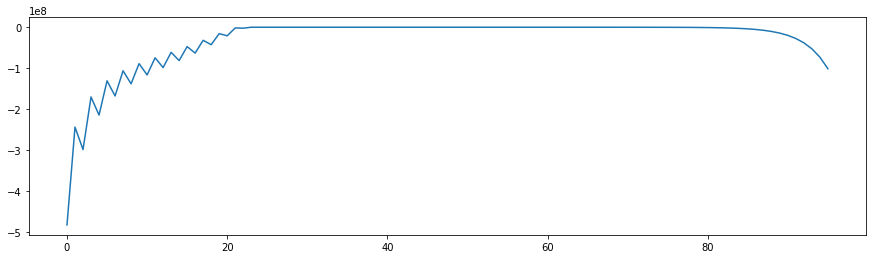

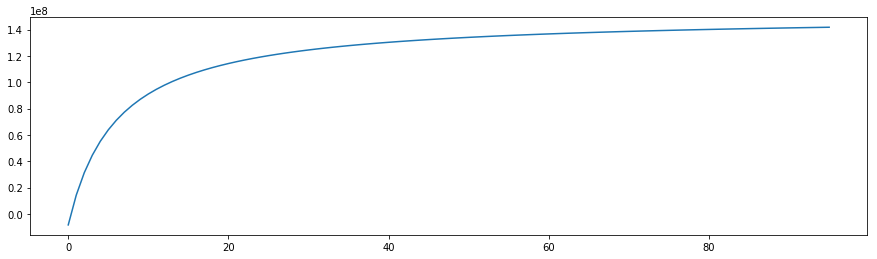

In [103]:
plt.plot(sum_Pos)
plt.show()
plt.plot(sum_Neg)
plt.show()
plt.plot(other)
plt.show()

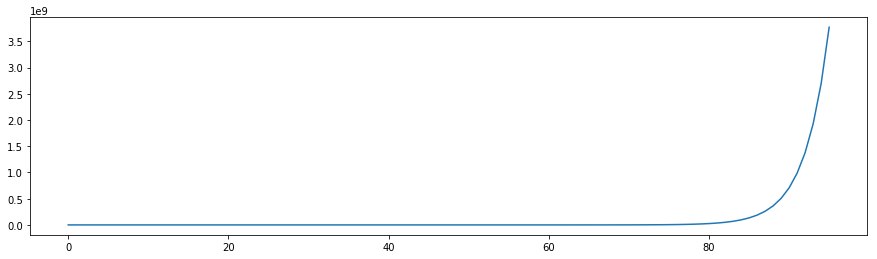

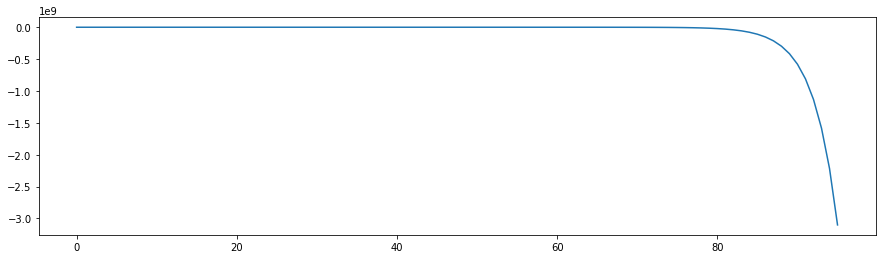

In [99]:
plt.plot(sum_pos)
plt.show()
plt.plot(sum_neg)
plt.show()

### Try incorporating $\sigma ^n$

In [112]:
Asig = [A[i]*sigp**i for i in range(100)]

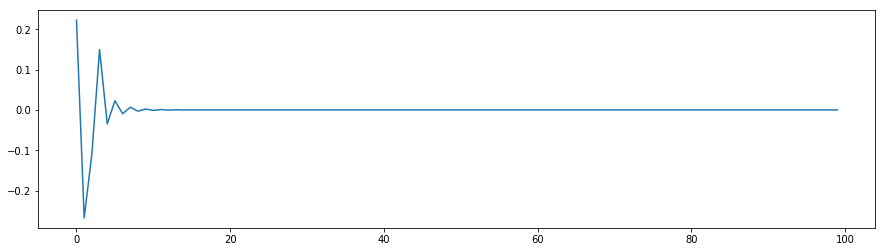

In [113]:
plt.plot(Asig)

Text(0.5,1,'$\\frac{|a_n|}{|a_{n-1}|}$')

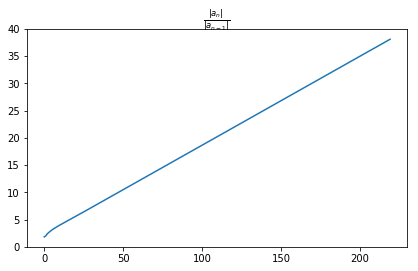

In [164]:
absA = [a0,a1,a2,a3]
checkratA0 = []
checkratA1 = []

for n in range(4,1000):
    s0 = 0
    s1 = 0
    for r in range(2,len(absA)):
        temp0 = r*abs(absA[r])*abs(absA[n-r+1])
        temp1 = r*absA[r]*absA[n-r+1]
        s0 += temp0
        s1 += temp1
    an0 = ((mu-(n-1)*nu)*abs(absA[-1])-nu*G*(s0))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    an1 = ((mu-(n-1)*nu)*absA[-1]-nu*G*(s1))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    checkratA0.append(s0)
    checkratA1.append(abs(s1))
    absA.append(s1)
    
    rat=[]
for i in range(len(checkratA)-1):
    rat.append(abs(checkratA1[i+1]*sigp/checkratA1[i]))
    
plt.subplot(121)
plt.plot(rat)
plt.title(r'$\frac{|a_n|}{|a_{n-1}|}$')
#plt.ylim(0,1)

In [154]:
absA = [a0,a1,a2,a3]
checkratA = []

In [155]:
for n in range(4,1000):
    s0 = 0
    s1 = 0
    for r in range(2,len(absA)):
        temp0 = r*abs(absA[r])*abs(absA[n-r+1])
        temp1 = r*absA[r]*absA[n-r+1]
        s0 += temp0
        s1 += temp1
    an0 = ((mu-(n-1)*nu)*abs(absA[-1])-nu*G*(s0))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    an1 = ((mu-(n-1)*nu)*absA[-1]-nu*G*(s1))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    checkratA.append(an0)
    absA.append(an1)

In [156]:
rat=[]
for i in range(len(checkratA)-1):
    rat.append(abs(checkratA[i+1]*sigp/checkratA[i]))

(0, 1)

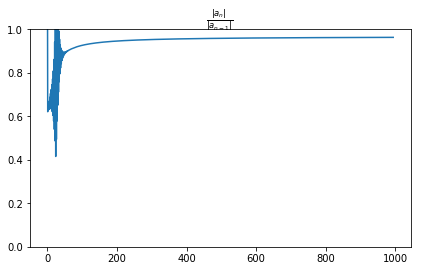

In [157]:
plt.subplot(121)
plt.plot(rat)
plt.title(r'$\frac{|a_n|}{|a_{n-1}|}$')
plt.ylim(0,1)

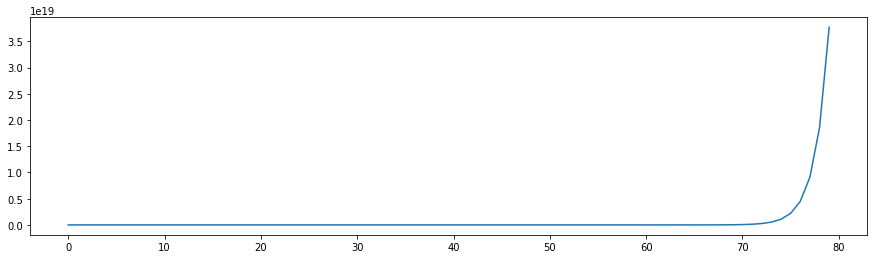

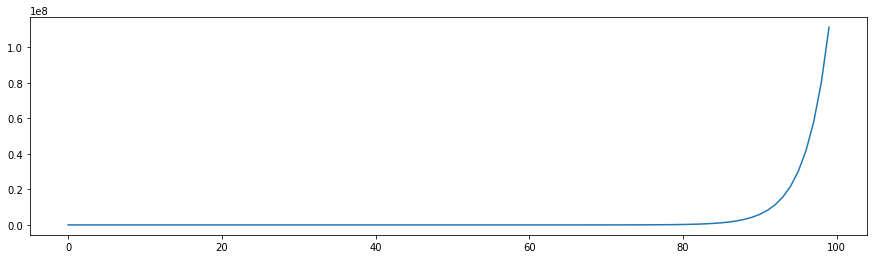

In [131]:
plt.plot(absA[:80])
plt.show()
plt.plot(A)
plt.show()

In [132]:
absAsig = [absA[i]*sigp**i for i in range(len(absA))]

In [133]:
rat1=[]
rat2 = []
for i in range(len(absAsig)-1):
    rat1.append(abs(absAsig[i+1]/absAsig[i]))
    rat2.append(abs(absAsig[i]/absAsig[i+1]))

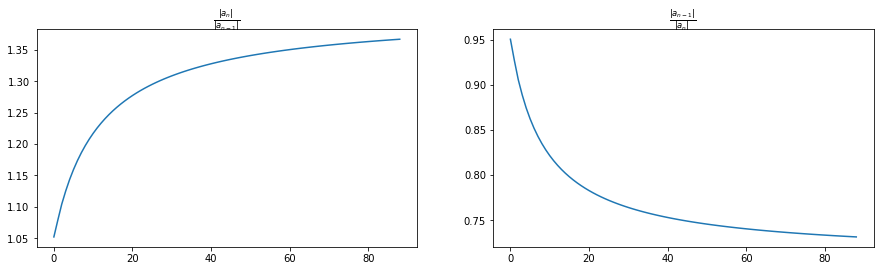

In [134]:
plt.subplot(121)
plt.plot(rat1[10:])
plt.title(r'$\frac{|a_n|}{|a_{n-1}|}$')
plt.subplot(122)
plt.plot(rat2[10:])
plt.title(r'$\frac{|a_{n-1}|}{|a_{n}|}$')
plt.show()

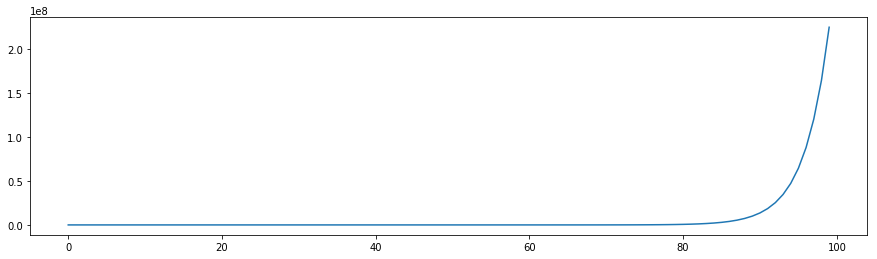

In [135]:
plt.plot(absAsig[:])
plt.show()

In [124]:
A

[0.2222222222222222,
 -0.40131935645314903,
 -0.2449092986032859,
 0.5040515141088068,
 -0.17641977354848062,
 0.17429329166194762,
 -0.10654546684989509,
 0.11299004741305796,
 -0.0804953551766689,
 0.08996236869975044,
 -0.06800192550641578,
 0.07979245189882628,
 -0.06129885101912232,
 0.07583035187325268,
 -0.05748268176683294,
 0.07577291054655705,
 -0.055124343207837816,
 0.07884147751981412,
 -0.053271486627356965,
 0.08502470139546718,
 -0.05102262851081576,
 0.09490128681288021,
 -0.047232992638977206,
 0.109721910215128,
 -0.04018459534348106,
 0.13170382268842531,
 -0.027098144082442772,
 0.16460611793290536,
 -0.00332953654428145,
 0.21475696802188202,
 0.039004202658025365,
 0.2928562297674774,
 0.11341278890821475,
 0.41713749507903203,
 0.24322054357607822,
 0.6189379948035695,
 0.4689613964766252,
 0.9525620803119721,
 0.8615142646883293,
 1.5128432208424811,
 1.5455614061188692,
 2.466578519973626,
 2.7416961109077223,
 4.109077309212488,
 4.842370918497551,
 6.9663742

### Try not adding the negative parts

In [ ]:
A2 = [a0,a1,a2,a3]
for n in range(4,100):
    s = 0
    for r in range(2,len(A2)):
        temp = r*A2[r]*A2[n-r+1]
        if temp >= 0:
            s += temp
    an = ((mu-(n-1)*nu)*A2[-1]-nu*G*(s))/((n*nu*(G-2)-mu*G)/(G+2)+(n+1)*nu*G*a1)
    A2.append(an)